In [ ]:
# Create the .kaggle directory to store Kaggle API credentials
# Copy kaggle.json (Kaggle API credentials) to the .kaggle directory

!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

cp: cannot stat 'kaggle.json': No such file or directory


In [ ]:
# Download the emotion-detection dataset from Kaggle

!kaggle datasets download -d ananthu017/emotion-detection-fer


Dataset URL: https://www.kaggle.com/datasets/ananthu017/emotion-detection-fer
License(s): CC0-1.0
emotion-detection-fer.zip: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
# Import Google Drive package to handle file access in Colab
# Mount Google Drive to access files from the drive in Colab

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import os
os.listdir('/content/drive/My Drive/')


['Colab Notebooks',
 'modified_medical.ipynb',
 'string_manipulate.ipynb',
 'data_wrangling_file_handling.ipynb',
 'practical_2(webscraping).ipynb',
 'archive(9).zip',
 'Practical_3(data_clean_preparation).ipynb']

In [ ]:
!pip install zipfile36  # Not necessary in Python 3.x, as zipfile is included by default.
# install zipfile36  # Not necessary in Python 3.x, as zipfile is included by default.


In [ ]:
import zipfile

import zipfile
import os

# Path to your ZIP file
zip_file_path = zipfile.ZipFile('/content/drive/My Drive/archive(9).zip', 'r')
zip_ref = zip_file_path
zip_ref.extractall('/content')  # Extract the contents to the Colab working directory
zip_ref.close()


In [ ]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,BatchNormalization,Dropout


In [ ]:
# generators
train_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/train',
    labels='inferred',
    label_mode = 'int',
    batch_size=32,
    image_size=(256,256)
)

validation_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/test',
    labels='inferred',
    label_mode = 'int',
    batch_size=32,
    image_size=(256,256)
)



Found 28709 files belonging to 7 classes.
Found 7178 files belonging to 7 classes.


In [ ]:
# Normalize
def process(image,label):
    image = tf.cast(image/255. ,tf.float32)
    return image,label

train_ds = train_ds.map(process)
validation_ds = validation_ds.map(process)

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization

# Create CNN model
model = Sequential()

# First convolutional block
model.add(Conv2D(32, kernel_size=(3, 3), padding='valid', activation='relu', input_shape=(256, 256, 3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2), strides=2, padding='valid'))

# Second convolutional block
model.add(Conv2D(64, kernel_size=(3, 3), padding='valid', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2), strides=2, padding='valid'))

# Third convolutional block
model.add(Conv2D(128, kernel_size=(3, 3), padding='valid', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2), strides=2, padding='valid'))

# Flatten for the fully connected layers
model.add(Flatten())

# Fully connected layer 1
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.1))

# Fully connected layer 2
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.1))

# Output layer (7 classes, softmax activation for multiclass classification)
model.add(Dense(7, activation='softmax'))

# Compile the model
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',  # Use sparse_categorical_crossentropy for integer labels
    metrics=['accuracy']
)

# Summary of the model
model.summary()


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)                    │ (None, 254, 254, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 254, 254, 32)        │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 127, 127, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 125, 125, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_4                │ (None, 125, 125, 64)        │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 62, 62, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 60, 60, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_5                │ (None, 60, 60, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 30, 30, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 115200)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 128)                 │      14,745,728 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 7)                   │             455 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 14,848,583 (56.64 MB)

 Trainable params: 14,848,135 (56.64 MB)

 Non-trainable params: 448 (1.75 KB)

In [ ]:
# Train the neural network model using the training dataset

history = model.fit(train_ds,epochs=10,validation_data=validation_ds)


Epoch 1/10
898/898 ━━━━━━━━━━━━━━━━━━━━ 78s 80ms/step - accuracy: 0.2209 - loss: 4.1690 - val_accuracy: 0.2388 - val_loss: 1.8198
Epoch 2/10
898/898 ━━━━━━━━━━━━━━━━━━━━ 76s 78ms/step - accuracy: 0.2516 - loss: 1.8007 - val_accuracy: 0.2835 - val_loss: 1.7323
Epoch 3/10
898/898 ━━━━━━━━━━━━━━━━━━━━ 66s 74ms/step - accuracy: 0.2780 - loss: 1.7237 - val_accuracy: 0.2940 - val_loss: 1.7140
Epoch 4/10
898/898 ━━━━━━━━━━━━━━━━━━━━ 85s 78ms/step - accuracy: 0.2946 - loss: 1.6773 - val_accuracy: 0.3012 - val_loss: 1.7041
Epoch 5/10
898/898 ━━━━━━━━━━━━━━━━━━━━ 67s 74ms/step - accuracy: 0.3049 - loss: 1.6513 - val_accuracy: 0.3055 - val_loss: 1.6718
Epoch 6/10
898/898 ━━━━━━━━━━━━━━━━━━━━ 85s 78ms/step - accuracy: 0.3134 - loss: 1.6321 - val_accuracy: 0.2371 - val_loss: 1.7844
Epoch 7/10
898/898 ━━━━━━━━━━━━━━━━━━━━ 79s 74ms/step - accuracy: 0.3165 - loss: 1.6201 - val_accuracy: 0.2782 - val_loss: 1.7206
Epoch 8/10
898/898 ━━━━━━━━━━━━━━━━━━━━ 69s 77ms/step - accuracy: 0.3241 - loss: 1.6039 - 

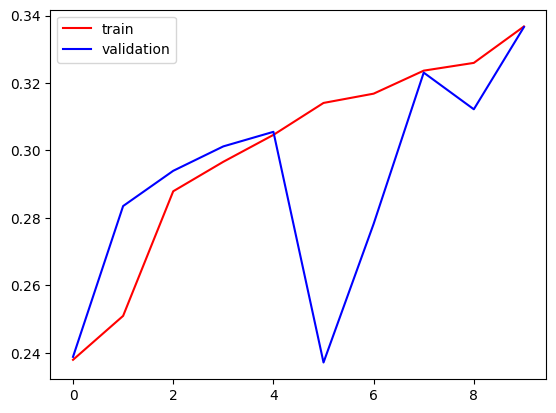

In [ ]:
import matplotlib.pyplot as plt
# Display the validation accuracy of the model
# Display the validation accuracy of the model
plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()







Saving 1000069176.jpg to 1000069176 (2).jpg


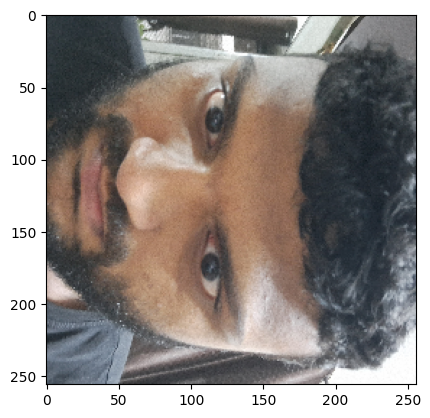

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 383ms/step
Predicted class: [5]


In [ ]:
from google.colab import files
from tensorflow.keras.preprocessing import image
import numpy as np

# Ask the user to upload an image
uploaded = files.upload()

# Load the image
for img_path in uploaded.keys():
    img = image.load_img(img_path, target_size=(256, 256))
    plt.imshow(img)
    plt.show()

    # Convert image to array
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array /= 255.0  # Normalize the image

    # Make prediction
    prediction = model.predict(img_array)
    predicted_class = np.argmax(prediction, axis=1)

    # Output the predicted class
    print(f'Predicted class: {predicted_class}')


In [ ]:
emotion_labels = ['Angry', 'Disgust', 'Fear', 'Happy', 'Neutral', 'Sad', 'Surprise']

# Output the actual emotion based on the predicted class
print(f'Predicted emotion: {emotion_labels[predicted_class[0]]}')


Predicted emotion: Sad


In [ ]:
# Evaluate accuracy
loss, accuracy = model.evaluate(validation_ds)
print(f'Validation accuracy: {accuracy*100:.2f}%')


225/225 ━━━━━━━━━━━━━━━━━━━━ 7s 30ms/step - accuracy: 0.3330 - loss: 1.6162
Validation accuracy: 33.66%
